<img src='https://storage.googleapis.com/kaggle-datasets-images/228/482/a520351269b547c89afe790820a1087e/dataset-cover.jpeg'>
* ref : kaggle  : https://www.kaggle.com/uciml/pima-indians-diabetes-database
    
    

## Pima Indians Diabetes Database
* Predict the onset of diabetes based on diagnostic measures
* UCI Machine Learning - updated 5 years ago (Version 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

# --------------------------------- NN ---------------------------
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

sns.set()

# 데이터 로드

In [2]:
df = pd.read_csv("./diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


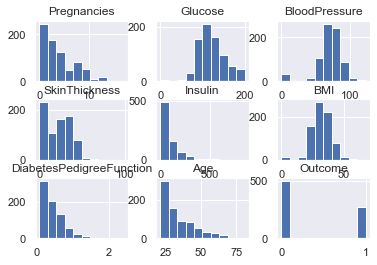

In [6]:
sns.set()
df.hist()
plt.show()

### ------------ 가공 == M.L과 동일

# NN

### 랜덤시드 고정

In [7]:
np.random.seed(0)
tf.random.set_seed(0)

### X, y (학습피쳐, 타겟) 분리 

In [8]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

### 모델

In [9]:
# model = DecesionTree()  ------  M.L XXXXX
#----------------------------------------
model = Sequential()
model.add(Dense(units=10, activation='relu',  input_dim=8  ))  #input_dim == shape피쳐갯수  (506, 9)
model.add(Dense(units=8,  activation='relu'))
model.add(Dense(units=4,  activation='relu'))
model.add(Dense(units=1,  activation='sigmoid'))
                          #adam = momentom + adaboost
model.compile(loss='binary_crossentropy',  optimizer='adam'  ,  metrics=['accuracy'])  #l.o.m
#----------------------------------------

### 9:1 데이터 나누기 +  학습(fit)
* df -- 9:1 train(9) test(1)
* train 8:2 train(8) val(2) == 9
---
* initial_epoch = 0,
* steps_per_epoch = None,
* validation_steps = None,
* validation_batch_size = None,

In [10]:
X_train9, X_test, y_train9, y_test = train_test_split(X,y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train9, y_train9, test_size=0.2)
print(df.shape , X_train.shape, X_val.shape, X_test.shape)

(768, 9) (552, 8) (139, 8) (77, 8)


### callback  (EarlyStopping, CheckPoint)
* EarlyStopping : 오버피팅 시 학습 중단
* CheckPoint : epoch 수행 후 점수가 좋아지면 해당 모델을 저장

In [11]:
stopping = EarlyStopping(monitor='val_loss',patience=10)

# os.path

import os

model_dir = './save_models/'
if not os.path.exists(model_dir):
    print("path error~!!!!")
else:
    print("path ok~!!!!")
    
#-----------------------------------------
# ModelCheckpoint : 가중치만 저장 
# model.save_weights("myweight.h5")
# model = Sequential()
# ....
# model.compile(...)  #l.o.m'
# model.load_weights("myweight.h5")
#-----------------------------------------
# model.save("mymodel.hdf5") : 모델+컴파일러+가중치 
# model.load("mymodel.hdf5")
#-----------------------------------------


model_path = "./save_models/{epoch:03d}_{val_loss:.4f}_weight.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_weights_only=True, save_best_only=True, period=1)

path ok~!!!!


### 학습 시작

In [12]:
# ------------ 나누기  == M.L
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100 ,shuffle=True,
          callbacks=[stopping,checkpoint]
          )  
# model.fit(X, y, validation_split=0.2, validation_data=(X_val,y_val), batch_size=10, epochs=100 )   #callbacks

Epoch 1/100
56/56 [==============================] - 1s 4ms/step - loss: 5.8360 - accuracy: 0.4982 - val_loss: 3.9918 - val_accuracy: 0.5540
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 2.7073 - accuracy: 0.5543 - val_loss: 2.4610 - val_accuracy: 0.5540
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 1.6012 - accuracy: 0.5707 - val_loss: 1.6719 - val_accuracy: 0.5827
Epoch 4/100
56/56 [==============================] - 0s 2ms/step - loss: 1.3161 - accuracy: 0.5870 - val_loss: 1.2982 - val_accuracy: 0.6043
Epoch 5/100
56/56 [==============================] - 0s 1ms/step - loss: 1.1942 - accuracy: 0.5851 - val_loss: 1.2981 - val_accuracy: 0.6043
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 1.0403 - accuracy: 0.5996 - val_loss: 0.9634 - val_accuracy: 0.6403
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.6322 - val_loss: 0.8865 - val_accuracy: 0.6475
Epoch 8/100
5

### 점수확인

In [13]:
train_loss = history.history['loss']
print(train_loss)

[5.836025238037109, 2.7073020935058594, 1.6012483835220337, 1.316050410270691, 1.1941596269607544, 1.040277123451233, 0.903608500957489, 0.8465508818626404, 0.7988040447235107, 0.7629367709159851, 0.7459658980369568, 0.7161958813667297, 0.7018795013427734, 0.6904804110527039, 0.6617619395256042, 0.6707350611686707, 0.651187539100647, 0.6436690092086792, 0.6312612295150757, 0.6278649568557739, 0.615355372428894, 0.6244332790374756, 0.6153076887130737, 0.6100898385047913, 0.607580304145813, 0.5972185134887695, 0.6038257479667664, 0.5887659788131714, 0.5870197415351868, 0.5872684121131897, 0.5845252871513367, 0.588232696056366, 0.5818232893943787, 0.5816922783851624, 0.5795062780380249, 0.5706716179847717, 0.5732883810997009, 0.5686147809028625, 0.5750224590301514, 0.5598773956298828, 0.5633149743080139, 0.5600409507751465, 0.5695292949676514, 0.5664253234863281, 0.568398654460907, 0.5733115077018738]


In [14]:
val_loss = history.history['val_loss']
print(val_loss)

[3.9917900562286377, 2.461045742034912, 1.671889066696167, 1.298249363899231, 1.2981129884719849, 0.9633782505989075, 0.8864724040031433, 0.9112275838851929, 0.7538473010063171, 0.7678659558296204, 0.7420486211776733, 0.6827051043510437, 0.6790122389793396, 0.6662944555282593, 0.7359597086906433, 0.6582931280136108, 0.6471620202064514, 0.6533164381980896, 0.6529350876808167, 0.6569757461547852, 0.6645328402519226, 0.6240560412406921, 0.6172918677330017, 0.6234024167060852, 0.6261270046234131, 0.6183552742004395, 0.6133976578712463, 0.6176034808158875, 0.6142621040344238, 0.6321581602096558, 0.6151058673858643, 0.6233278512954712, 0.6248372793197632, 0.6345744132995605, 0.6027897596359253, 0.6018081903457642, 0.6049609780311584, 0.6025747656822205, 0.6139797568321228, 0.6024763584136963, 0.6052483916282654, 0.6041523814201355, 0.6058725714683533, 0.6067782044410706, 0.6293438673019409, 0.6157596111297607]


## 실제 맞춰야 될 데이터

In [22]:
# X_test_cp = X_test.copy()
# X_test_cp['Outcome'] = y_test
# X_test_cp.to_csv("test.csv", index=False)
# del X_test_cp

In [15]:
score = model.evaluate(X_test, y_test)
print(score)

3/3 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7013
[0.5628481507301331, 0.701298713684082]


In [16]:
pred = model.predict(X_test)
print(pred[:5])

[[0.624215  ]
 [0.08670115]
 [0.40230328]
 [0.41630876]
 [0.27746397]]


### 차트 : loss 차이 

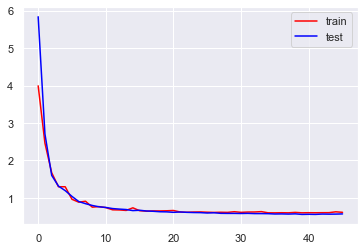

In [17]:
plt.plot(np.arange(len(val_loss)),  val_loss, c='red', label='train')
plt.plot(np.arange(len(val_loss)),  train_loss, c='blue', label='test')
plt.legend()
plt.show()

In [18]:
train_acc = history.history['accuracy']; print(train_acc)
val_acc   = history.history['val_accuracy']; print(val_acc)


[0.49818840622901917, 0.554347813129425, 0.570652186870575, 0.5869565010070801, 0.5851449370384216, 0.5996376872062683, 0.6322463750839233, 0.6268116235733032, 0.6268116235733032, 0.625, 0.6322463750839233, 0.6376811861991882, 0.6413043737411499, 0.6376811861991882, 0.6557971239089966, 0.6503623127937317, 0.657608687877655, 0.6539855003356934, 0.6557971239089966, 0.6739130616188049, 0.6594203114509583, 0.6739130616188049, 0.66847825050354, 0.6757246255874634, 0.6775362491607666, 0.6739130616188049, 0.6902173757553101, 0.6721014380455017, 0.6757246255874634, 0.6739130616188049, 0.6865941882133484, 0.66847825050354, 0.6920289993286133, 0.6775362491607666, 0.6920289993286133, 0.6865941882133484, 0.6811594367027283, 0.6920289993286133, 0.6865941882133484, 0.7083333134651184, 0.7047101259231567, 0.7047101259231567, 0.695652186870575, 0.6920289993286133, 0.695652186870575, 0.6721014380455017]
[0.5539568066596985, 0.5539568066596985, 0.5827338099479675, 0.6043165326118469, 0.6043165326118469,

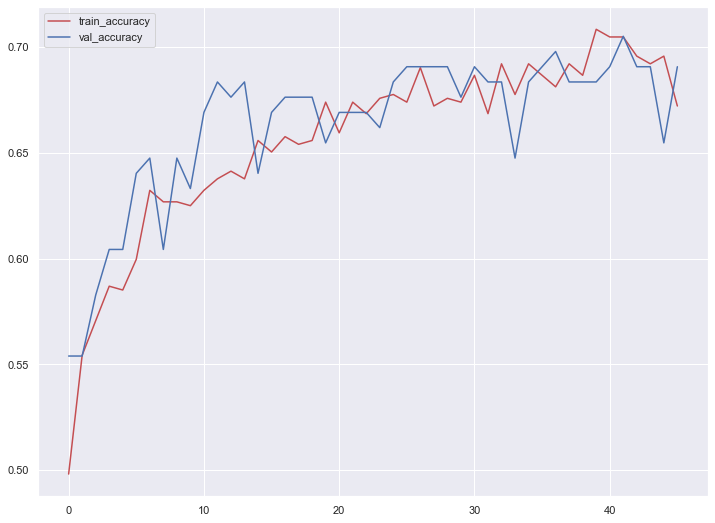

In [19]:
f = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(len(train_acc)), train_acc, c='r', label='train_accuracy')
plt.plot(np.arange(len(train_acc)), val_acc, c='b', label='val_accuracy')
plt.legend()
plt.legend(); plt.show()


<img src="output.png">